# Modelling Crop Recommendation

## Summary & How to Use

Agraris is a model to classify the land based on the user's input to get the best crop for the land. By using this model, we can get the best kind of crop to be cultivated in the user's respective land to maximize the productivity of the land.

## How to make the model?

### Data Pre-processing

1. Load the dataset from the dataset folder from **"dataset/Crop_recommendation.csv"** using pandas.

2. Get the description of the data statistically to find the overall value of the data by using **describe()**.

3. **Encode** the labels to integer value (as a string is a little bit complicated to be used as it is). After it is encoded as integer, a **JSON** file is made to **keep track of the encoded labels**. So, the **dictionary** of **key-value of string-integer pair** is stored in a file named **"dataset/labelEncoder_dict.json"**.

4. **Scale** the data (as the data's range are too various, and it will be a hard job for the system to directly process the data into the model) using **MinMaxScaler of Sci-Kit Learn**. The scaled data are applied to the dataframe for visualization purpose.

   **Note: The scaled data are only the features. Labels are NOT scaled.**

   

### Data Preparation for Modelling

5. Separate/select the label, and the feature. As the label is located in the last index (the 7th index), and put the other column into the features columns.
6. Cast the 22 labels into a simplified 22 columns of binary number, as binary numbers are way easier for the system to process rather than the number as it is. To do this, use the Keras' utility, the tf.keras.utils.to_categorical([array]).
7. Split and shuffle the feature and the label (X and y) into 2 different usage. In this scoop, the feature is divided as the train set and test set with the proportion of 90% train set, and the 10% as the test set.



### Modelling Process

8. Define the model. In this scoop, the model uses 4 layers of Keras' Dense layer. The activation function used in the model is ReLu for the first 3 layers, as the ReLU activation function is one of the best activation function.

   The last activation function is different (softmax) is used to do multi-class classification.

9. Define the callbacks that are going to be used. In this case, there are two callbacks that are used in this model. The first callback is the Reminder callback, which is used to get the notification that the accuracy has reached the threshold of the accuracy (in this scoop is 0.99). This callback is used to flag the "good" model, and differ it from the others.

10. Define the second callback (checkpointCB). This checkpoint is used to save the best model that this iteration has ever had. The model is stored at the model folder. This callback is used to get the best model for the prediction later, or just to simply save the model as a .h5 file to be able to be reused.

11. Compile the model. The loss used in this optimization is the categorical cross-entropy (this loss is optimized for multi-class classification). To fit this model better, the Root Mean Square Propagation (RMS-Prop) with the accuracy as the metric.

12. Fit the model with the epoch of 200, and the steps per epoch is 50.

    

### Evaluation

13. Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.
14. Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

## Data Processing
As the data from the dataset is the raw data, we need to process the data first before it is able to be used well. To get the best model, we need to supply it with the best processed data, not a raw data.

### Load Libraries
Load the libraries needed by using import. The libraries needed:

- Pandas
- NumPy
- Sci-Kit Learn
- Tensorflow
- JSON
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

### Load Dataset
Load the dataset from the dataset folder from **"dataset/Crop_recommendation.csv"** using pandas.

This dataset is the main dataframe that will be used in this process from the pre-processing step, into the modelling step. The result of the raw dataset is shown below.

In [2]:
#load dataset

file_name = "dataset/Crop_recommendation.csv"
df = pd.read_csv(file_name)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Get the Description of Dataset

Get the description of the data statistically to find the overall value of the data by using **describe()**.

By getting this information, we can get the overview of the dataset, thus helping us in preprocessing the data (determine the scaling, and the encoding process).

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Encode the label column

**Encode** the labels to integer value (as a string is a little bit complicated to be used as it is). After it is encoded as integer, a **JSON** file is made to **keep track of the encoded labels**. So, the **dictionary** of **key-value of string-integer pair** is stored in a file named **"dataset/labelEncoder_dict.json"**.

This process is used to make the data processing by the system better, and faster, as numbers are easier to process than string. After the label is encoded, a JSON file is made to keep track of the encoded string-integer pair.

In [4]:
#encode labels to int, and parse to json
labelEncoder = LabelEncoder()

labelEncoder.fit(df["label"])
labelEncoder_key_value = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

keys_values = labelEncoder_key_value.items()
output_key_val = {str(key): str(value) for key, value in keys_values}

with open('dataset/labelEncoder_dict.json', 'w') as output_file:
    json.dump(output_key_val, output_file, indent=4)

pd.DataFrame(labelEncoder_key_value.items(), columns=['Original Label', 'Encoded'])

,Original Label,Encoded
0,apple,0
1,banana,1
2,blackgram,2
3,chickpea,3
4,coconut,4
5,coffee,5
6,cotton,6
7,grapes,7
8,jute,8
9,kidneybeans,9


In [5]:
#apply to dataset

df["label"] = labelEncoder.transform(df["label"])

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


### Scale the data using MinMax Scaler

**Scale** the data (as the data's range are too various, and it will be a hard job for the system to directly process the data into the model) using **MinMaxScaler of Sci-Kit Learn**. The scaled data are applied to the dataframe for visualization purpose.

**Note: The scaled data are only the features. Labels are NOT scaled.**

The data is scaled to process this data better. The data is hard to process without the scaling process as the range is wide. Therefore, the scaling process is needed.

In [6]:
#scaling to reduce range

minmaxScaler = MinMaxScaler()
minmaxScaler.fit(df.iloc[:, 0:-1])
df.iloc[:, 0:-1] = minmaxScaler.transform(df.iloc[:, 0:-1])

In [7]:
#df before modelling

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,5
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,5
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,5
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,5


## Data Preparation for Modelling

The data is already "cleansed" and "chopped" by doing the pre-processing process. What's left is to prepare it for the modelling process. In this part, we are going to prepare it to be ready to be used by the model.

### Feature & Label Selection

Separate/select the label, and the feature. As the label is located in the last index (the 7th index), and put the other column into the features columns.

The X and y (feature and label) has not been defined yet. The data is still in the model of dataframe, and it needs to be separated as feature, and label.
The label is the data from the last column, while the feature(s) are the rest of the data other than label.

This is why the separation is needed.

In [8]:
#feature x label selection

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

### Encode the label using one-hot Encoding

Encode the 22 labels into a simplified 22 columns of binary number, as binary numbers are way easier for the system to process rather than the number as it is. To do this, use the Keras' utility, the tf.keras.utils.to_categorical([array]).

By using this syntax, the data are able to be processed way better than using only one column. By encoding the data, the system can process it more precisely.

In [9]:
#one-hot encoding for label

y = tf.keras.utils.to_categorical(y)

### Split & Shuffle to Train Set and Test Set

Split and shuffle the feature and the label (X and y) into 2 different usage. In this scoop, the feature is divided as the train set and test set with the proportion of 90% train set, and the 10% as the test set.

This split is performed to be able to use 1 dataset as the train set, as it is a test set too, so that one dataset is enough for the development.

In [10]:
#train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling Process

The modelling process is the main topic of this document, as the modelling is the part where we make a new model based on the need. These are the steps in the model which will be used in the model.

1. Define the model.
    - In this scoop, the model uses 4 layers of Keras' Dense layer. The activation function used in the model is ReLu for the first 3 layers, as the ReLU activation function is one of the best activation function.
    - The last activation function is different (softmax) is used to do multi-class classification.
2. Define the callbacks that are going to be used.
    - In this case, there are two callbacks that are used in this model. The first callback is the Reminder callback, which is used to get the notification that the accuracy has reached the threshold of the accuracy (in this scoop is 0.99). This callback is used to flag the "good" model, and differ it from the others.

3. Define the second callback (checkpointCB).
    - This checkpoint is used to save the best model that this iteration has ever had. The model is stored at the model folder. This callback is used to get the best model for the prediction later, or just to simply save the model as a .h5 file to be able to be reused.

4. Compile the model.
    - The loss used in this optimization is the categorical cross-entropy (this loss is optimized for multi-class classification). To fit this model better, the Root Mean Square Propagation (RMS-Prop) with the accuracy as the metric.

5. Fit the model.
    - Fit the complied model with the epoch of 200, and the steps per epoch is 50.

In [11]:
#modelling process

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax')
])

class Reminder(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.99
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD and logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nTarget reached %2.2f%%. Stop Training" %(ACCURACY_THRESHOLD*100))
            # self.model.stop_training = True

reminderCB = Reminder()

checkpoint_filepath = 'model/weights.{epoch:02d}-{val_loss:.3f}.h5'
checkpointCB = tf.keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    monitor='val_accuracy',
                    mode='max',
                    save_best_only=True)

model.compile(loss='categorical_crossentropy',optimizer='rmsprop' ,metrics=['accuracy'])

fitting_history = model.fit(
                        X_train,
                        y_train,
                        epochs=200,
                        steps_per_epoch = 50,
                        validation_data=(X_test, y_test),
                        callbacks = [reminderCB,checkpointCB],
                    )

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 2.4963 - accuracy: 0.3763 - val_loss: 1.8731 - val_accuracy: 0.5091
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 1.3580 - accuracy: 0.6525 - val_loss: 1.0498 - val_accuracy: 0.7364
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.7606 - val_loss: 0.7665 - val_accuracy: 0.8000
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.8338 - val_loss: 0.5902 - val_accuracy: 0.8273
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8747 - val_loss: 0.5721 - val_accuracy: 0.7955
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8803 - val_loss: 0.4127 - val_accuracy: 0.8636
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.9066 - val_loss: 0.3956 - val_accuracy: 0.8591
Epoch 8/200
5

## Evaluation

The evaluation process is the last process in this document. This evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are to graphs going to be made, the accuracy plot, and the loss plot.

### Accuracy Plotting

Plot the accuracy of the model in the epoch. The plot is for accuracy of both the train set and the test set. After plotting, check the graph. Does the accuracy continue to increase or keep decreasing? If it continues to increase, then the model is well-fit.

In this case, the graph shows that the accuracy is increasing in both train and test set. This means that the model is well-fit.

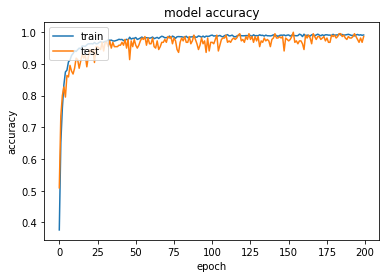

In [12]:
plt.plot(fitting_history.history['accuracy'])
plt.plot(fitting_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Loss Plotting

Plot the loss of the model in the epoch. As the opposite of accuracy, the plot is for loss of both the train set and the test set should decrease in each epoch. After plotting, check the graph. Does the loss continue to decrease or keep increasing? If it continues to decrease, then the model is well-fit.

In this case, the graph shows that the loss is decreasing in both train and test set. This means that the model is well-fit.

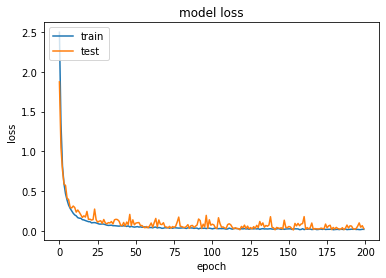

In [13]:
plt.plot(fitting_history.history['loss'])
plt.plot(fitting_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion

Based on the evaluation matrix (from the graph of the accuracy and the loss function), the model made was well-fit with the accuracy and the val_accuracy higher than 99.00%.
So, we can use the best model generated from this model to predict our data.